<a href="https://colab.research.google.com/github/Niloofar-SecML/CNN/blob/main/2_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles


In [10]:
# Activation functions and derivatives
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def relu_backward(dA, cache):
    Z = cache
    dZ = dA * (Z > 0)
    return dZ

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ


In [11]:
# Loss function
def compute_loss(a3, Y):
    m = Y.shape[1]
    loss = -np.sum(Y * np.log(a3 + 1e-8) + (1 - Y) * np.log(1 - a3 + 1e-8)) / m
    return np.squeeze(loss)

In [12]:
# Forward propagation
def forward_propagation(X, parameters):
    W1, b1 = parameters["W1"], parameters["b1"]
    W2, b2 = parameters["W2"], parameters["b2"]
    W3, b3 = parameters["W3"], parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1, cache1 = relu(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2, cache2 = relu(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3, cache3 = sigmoid(Z3)

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache


In [13]:
# Backward propagation
def backward_propagation(X, Y, cache):
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    m = X.shape[1]

    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = relu_backward(dA2, Z2)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = relu_backward(dA1, Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1,
             "dW2": dW2, "db2": db2,
             "dW3": dW3, "db3": db3}

    return grads


In [14]:
# Parameter update
def update_parameters(parameters, grads, learning_rate):
    for l in range(1, 4):
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]
    return parameters

In [15]:
# Prediction
def predict(X, parameters):
    A3, _ = forward_propagation(X, parameters)
    return (A3 > 0.5).astype(int)

In [16]:
# Initialization methods
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    for l in range(1, len(layers_dims)):
        parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l - 1]))
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    for l in range(1, len(layers_dims)):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * 10
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

def initialize_parameters_he(layers_dims):
    np.random.seed(3)
    parameters = {}
    for l in range(1, len(layers_dims)):
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2. / layers_dims[l - 1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [18]:
# Main model function
def model(X, Y, learning_rate=0.01, num_iterations=15000, print_cost=True, initialization="he"):
    layers_dims = [X.shape[0], 10, 5, 1]
    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)
    else:
        raise ValueError("Initialization must be 'zeros', 'random', or 'he'.")

    costs = []
    for i in range(num_iterations):
        A3, cache = forward_propagation(X, parameters)
        cost = compute_loss(A3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)

    plt.plot(costs)
    plt.xlabel("Iterations (x1000)")
    plt.ylabel("Cost")
    plt.title(f"Learning rate = {learning_rate}")
    plt.show()

    return parameters


In [19]:
# Create and preprocess dataset
def load_dataset():
    X, Y = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=1)
    X = X.T
    Y = Y.reshape(1, Y.shape[0])
    return X[:, :200], Y[:, :200], X[:, 200:], Y[:, 200:]

In [20]:
# Visualize decision boundary
def plot_decision_boundary(model_func, X, y):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model_func(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=y.squeeze(), cmap=plt.cm.Spectral)


Cost after iteration 0: 0.9201989595025631
Cost after iteration 1000: 0.573507245520916
Cost after iteration 2000: 0.27818794161733434
Cost after iteration 3000: 0.13199084227081875
Cost after iteration 4000: 0.07807941069777564
Cost after iteration 5000: 0.05300963881353557
Cost after iteration 6000: 0.038777466899030714
Cost after iteration 7000: 0.029794010732446266
Cost after iteration 8000: 0.02371079394449953
Cost after iteration 9000: 0.019370392134271504
Cost after iteration 10000: 0.016057744632147104
Cost after iteration 11000: 0.013424396847419647
Cost after iteration 12000: 0.011323903385675647
Cost after iteration 13000: 0.009683616555142504
Cost after iteration 14000: 0.008403551851336854


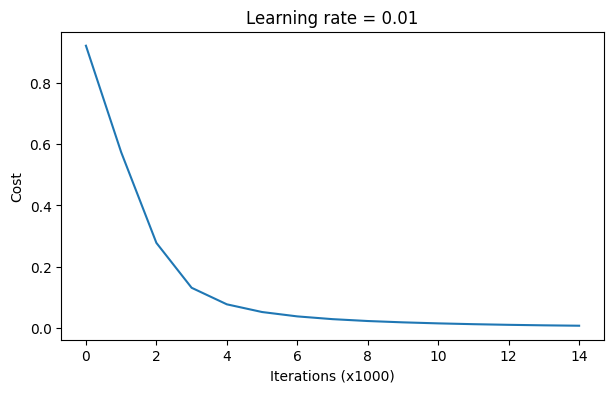

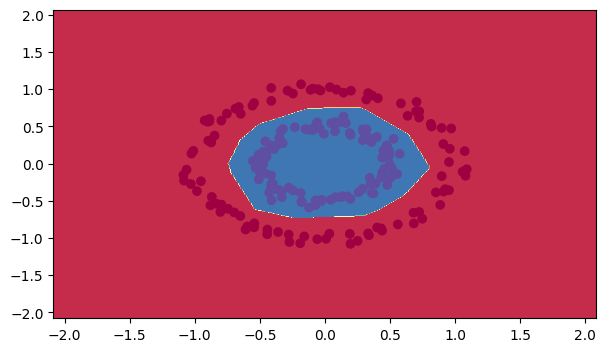

In [21]:
# Run everything
train_X, train_Y, test_X, test_Y = load_dataset()
parameters = model(train_X, train_Y, initialization="he")
plot_decision_boundary(lambda x: predict(x, parameters), train_X, train_Y)